## Reading in files

In [ ]:
file_idn = '1DsX8MXyVJg5OWJn3cWkA-Onx-IaBmzNT'
file_id_train_new = '177Zi7jxlZBFRKUeWOpTMOGjLw5JOinks'
file_id_test_new = '1t0BXk5FQuIZ-m98Tp06cZJZBZTNHOLZz'
file_id_dict = '1XyhjzSuZu3-Rego09BGdwznJcuo-4sBk'

!gdown {file_idn} -O novice.xslx
!gdown {file_id_train_new} -O train.xslx
!gdown {file_id_test_new} -O test.xslx
!gdown {file_id_dict} -O dict.xslx     # this block of code should download the relevant files.     # this block of code should download the relevant files.


Downloading...
From: https://drive.google.com/uc?id=1DsX8MXyVJg5OWJn3cWkA-Onx-IaBmzNT
To: /content/novice.xslx
100% 1.80M/1.80M [00:00<00:00, 16.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=177Zi7jxlZBFRKUeWOpTMOGjLw5JOinks
To: /content/train.xslx
100% 35.9M/35.9M [00:00<00:00, 46.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1t0BXk5FQuIZ-m98Tp06cZJZBZTNHOLZz
To: /content/test.xslx
100% 2.11M/2.11M [00:00<00:00, 17.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XyhjzSuZu3-Rego09BGdwznJcuo-4sBk
To: /content/dict.xslx
100% 40.9k/40.9k [00:00<00:00, 89.5MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_dct = pd.read_excel('dict.xslx', index_col=0)
df_train = pd.read_excel('train.xslx')
df_test = pd.read_excel('test.xslx')
df_novice = pd.read_excel('novice.xslx')  # this reads the files into DFs properly.

## Import statements


In [ ]:
import pandas as pd
import re
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 0)

In [ ]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.stem import PorterStemmer
import string
import re
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('words')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
!pip install pyspellchecker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 72.2 MB/s eta 0:00:00


## Exploring

In [ ]:
df_train['Program Type'].unique()

array(['Community', 'Site', 'Site Based Facilitated', 'Site Based Plus'],
      dtype=object)

In [ ]:
word_mappings = {
    'msp': 'match support place',
    'msw': 'team',
    'msc': 'team',
    'mst': 'team',
    'ms': 'team',
    'mss': 'team',
    'mec': 'team',
    'bbbs': 'team',
    'bbb': 'team',
    'bbs': 'team',
    'bsw': 'team',
    'pc' : 'parent',
    'mc': 'team',
    'match engagement coordinator': 'team',
    'big brothers big sisters of the greater twin cities': 'team',
    'big brothers big sisters': 'team',
    'bs': 'mentor',
    'bb': 'mentor',
    'bcs': 'mentor',
    'bss': 'mentor',
    'bd': 'mentor',
    'bc': 'mentor',
    'bl': 'mentor',
    'Ls': 'child',
    'Lb': 'child',
    'pc': 'team'
}

In [ ]:
import pandas as pd

def find_keyword_occurrences(df, column_name, word_mappings):
    """
    For each keyword, find the first two occurrences in the column and print them.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data
    column_name (str): Name of the column to search in
    word_mappings (dict): Dictionary of keywords
    """
    # Convert column to string type to avoid issues with non-string values
    df[column_name] = df[column_name].astype(str)

    # Go through each keyword
    for keyword in word_mappings.keys():
        print(f"\nKeyword: {keyword} (meaning: {word_mappings[keyword]})")

        # Find rows containing the keyword (case insensitive)
        matches = df[df[column_name].str.contains(r'\b' + keyword + r'\b', case=False, regex=True)]

        # Take first two occurrences
        occurrences = matches.head(2)

        if len(occurrences) == 0:
            print("  No occurrences found")
        else:
            # Print each occurrence
            for i, (_, row) in enumerate(occurrences.iterrows(), 1):
                print(f"  Occurrence {i}: {row[column_name]}")

find_keyword_occurrences(df_train, 'Match Support Contact Notes', word_mappings)


Keyword: msp (meaning: match support place)
  Occurrence 1: MEC reached out to Bigs via email and offered a variety of information and recapts of things that are important to know. MEC linked them to the Bigs Newsletter and the Updated in person meeting guidelines which allow matches to meet in person, if participants are open to it, and if they follow the CDC Guidelines. MEC linked her new phone number as this has changed, and a variety of activity resources for both in person and virtual activities. MEC offered an opportunity to connect via phone (scheduling via acuity), complete the online check in, or give MEC a call on her new phone. MORGAN RESPONDED: Hi Jeanna, Hope all is well! My little sister informed me recently that her family is moving to TX in June ? her mom confirmed. I am wondering if they have told you? What does this look like on the BBBS end? I am committed to staying in contact with L_first_name when she moves through call, letters, etc. but I am interested in addin

In [ ]:
df_train['Stage'].unique()

array(['Closed', 'Active', 'Pending Closure'], dtype=object)

## Replacing all acronymns

In [ ]:
import pandas as pd

# Assuming df_train is already defined and contains the 'Match Support Contact Notes' column

# Case-sensitive replacements
case_sensitive_mappings = {
    'Big': 'mentor',
    'Little': 'child',
    'B_first_name': "mentor",
    'B_last_name': "mentor",
    'L_first_name': "child",
    'L_last_name': "child",
    'Bigs': 'mentors',
    'Littles': 'children'
}

# Case-insensitive replacements
word_mappings = {
        'msp': 'match support place',
    'msw': 'team',
    'msc': 'team',
    'mst': 'team',
    'ms': 'team',
    'mss': 'team',
        'emc': 'team',
    'mec': 'team',
    'bbbs': 'team',
    'bbb': 'team',
    'bbs': 'team',
    'bsw': 'team',
    'pc' : 'parent',
    'mc': 'team',
    'match engagement coordinator': 'team',
    'big brothers big sisters of the greater twin cities': 'team',
    'big brothers big sisters': 'team',
    'bs': 'mentor',
    'bb': 'mentor',
    'bcs': 'mentor',
    'bss': 'mentor',
    'bd': 'mentor',
    'bc': 'mentor',
    'bl': 'mentor',
    'Ls': 'child',
    'Lb': 'child',
    'pc': 'team',
    'msg': 'message',
    'lol': 'laugh',
    'mia': 'missing in action',
    'btw': 'by the way',
    'bf': 'boyfriend',
    'bff': 'best friend',
    'lib': 'library',
    'lmk': 'let me know',
    'appt': 'appointment',
    'apt': 'apartment',
    'asap': 'as soon as possible',
    'convo': 'conversation',
    'fyi': 'for your information',
    'mins': 'minutes',
    'mtg': 'meeting',
    'pls': 'please',
    'thx': 'thanks',
    'ty': 'thank you',
    'w/': 'with',
    'w/o': 'without',
    'yr': 'year',
    'yrs': 'years',
    'b/c': 'because',
    'b/w': 'between',
    'info': 'information',
    'intro': 'introduction',
    'comm': 'communication',
    'ofc': 'of course',
    'idk': "I don't know",
    'imo': 'in my opinion',
    'rn': 'right now',
    'bc': 'because',
    'tmrw': 'tomorrow',
    'def': 'definitely',

}





In [ ]:
# Apply case-sensitive replacements
df_train['Match Support Contact Notes'] = df_train['Match Support Contact Notes'].replace(case_sensitive_mappings, regex=True)

# Apply case-insensitive replacements
df_train['Match Support Contact Notes'] = df_train['Match Support Contact Notes'].replace(
    {fr'(?i)\b{k}\b': v for k, v in word_mappings.items()}, regex=True
)


In [ ]:
# Apply case-sensitive replacements
df_test['Match Support Contact Notes'] = df_test['Match Support Contact Notes'].replace(case_sensitive_mappings, regex=True)

# Apply case-insensitive replacements
df_test['Match Support Contact Notes'] = df_test['Match Support Contact Notes'].replace(
    {fr'(?i)\b{k}\b': v for k, v in word_mappings.items()}, regex=True
)

In [ ]:
# Display updated DataFrame
df_test['Match Support Contact Notes'].head()

,Match Support Contact Notes
0,Question: Activities: Answer: mentor...
1,Question: Activities: Answer: mentor...
2,NaN
3,Question: Activities: Answer: team m...
4,Question: Activities: Answer: team s...


## Spelling Cleaning

In [ ]:
# Initialize spell checker
spell = SpellChecker()

# Get the first 10 words from the list
sample_words = all_non_english_words_list[:10]

# Compute corrections
corrections = {word: spell.correction(word) for word in sample_words}

# Print results
for word, correction in corrections.items():
    print(f"Original: {word} -> Suggested: {correction}")


Original: sonder -> Suggested: wonder
Original: winners -> Suggested: winners
Original: helpline -> Suggested: helpline
Original: denny -> Suggested: denny
Original: zamarielle -> Suggested: amarelle
Original: tweens -> Suggested: teens
Original: agencies -> Suggested: agencies
Original: wante -> Suggested: want
Original: lamar -> Suggested: lamar
Original: caves -> Suggested: caves


In [ ]:
import re
from spellchecker import SpellChecker

def simple_spell_check(text):
    """
    Simple spell checking function that preserves numbers and handles None values.

    Parameters:
    text (str): Text to spell check

    Returns:
    str: Text with spelling corrected
    """
    # Handle non-string inputs
    if not isinstance(text, str):
        return text

    # Initialize spell checker
    spell = SpellChecker()

    # Split text into words
    # This regex splits on whitespace but preserves punctuation
    words = re.findall(r'\b[\w\']+\b|\S', text)

    corrected_words = []
    for word in words:
        # Skip None values
        if word is None:
            corrected_words.append("")
            continue

        # Skip punctuation, single characters, and preserve numbers
        if (not word.isalpha() or len(word) <= 1 or
            any(char.isdigit() for char in word)):
            corrected_words.append(word)
            continue

        # Skip capitalized words (likely proper nouns)
        if word[0].isupper() and word[1:].islower():
            corrected_words.append(word)
            continue

        # Check if the word is misspelled
        if word.lower() in spell.unknown([word.lower()]):
            # Get correction
            correction = spell.correction(word.lower())

            # Guard against None returned from correction
            if correction is None:
                corrected_words.append(word)  # Keep original if correction fails
                continue

            # Preserve original capitalization
            if word.isupper():
                correction = correction.upper()
            elif word[0].isupper():
                correction = correction.capitalize()

            corrected_words.append(correction)
        else:
            corrected_words.append(word)

    # Reconstruct text with proper spacing
    corrected_text = ""
    for i, word in enumerate(corrected_words):
        # Ensure word is a string and not None
        if word is None:
            word = ""

        # Add space if needed
        if i > 0 and word and corrected_words[i-1]:
            prev_word = corrected_words[i-1]
            # Check if current word is not punctuation and previous word is not an opening bracket
            if (word not in ".,;:!?)}]'\"" and
                prev_word not in "({['\""):
                corrected_text += " "

        corrected_text += word

    return corrected_text

# Example usage:
df_train['Match Support Contact Notes'] = df_train['Match Support Contact Notes'].apply(simple_spell_check)

In [ ]:
df_train.to_excel('train_spell_checked1.xlsx', index=False)

## Match support contact notes split

In [ ]:
def reformat_questions(text):
    if pd.isna(text) or not isinstance(text, str) or not text.strip():
        return text

    # Split the text based on occurrences of "Question:"
    parts = re.split(r'(?i)(?=Question:)', text)  # Keep "Question:" as a delimiter

    formatted_parts = []

    for part in parts:
        part = part.strip()

        # If part starts with "Question:", extract Q&A
        if part.lower().startswith("question:"):
            qa_match = re.search(r'(?i)Question:\s*(.*?)(?:\s*Answer:\s*(.*))?$', part, re.DOTALL)

            if qa_match:
                question = qa_match.group(1).strip()
                answer = qa_match.group(2).strip() if qa_match.group(2) else ""

                # Skip empty or invalid answers
                if answer and answer not in {".", "-", ''} and not re.search(r'see\s*\.{0,3}\s*(?:team)?\s*notes', answer, re.IGNORECASE):
                    formatted_parts.append(f"{question}{answer}")
        else:
            formatted_parts.append(part)  # Keep non-question text unchanged

    return ' '.join(formatted_parts)  # Reconstruct the text


In [ ]:
df_train['Match Support Contact Notes'] = df_train['Match Support Contact Notes'].apply(reformat_questions)

In [ ]:
df_test['Match Support Contact Notes'] = df_test['Match Support Contact Notes'].apply(reformat_questions)

In [ ]:
df_test['Match Support Contact Notes'].head()

,Match Support Contact Notes
0,Activities:mentor and child have been partici...
1,Activities:mentor and child have been partici...
2,NaN
3,Activities:team met with mentor at group matc...
4,Activities:team spoke with mentor via telepho...


In [ ]:
df_test.to_excel('test_reformatted.xlsx', index=False)

In [ ]:
df_train['Match Support Contact Notes'].head()

,Match Support Contact Notes
0,team Notes:Match Closing with mentor via emai...
1,team Notes:See communication log for details ...
2,Activities:Match Closed. team Notes:Match Clo...
3,Activities:team asked about activities. mento...
4,Activities:team asked about activities. mento...


In [ ]:

# Define section headers
sections = [
    "Activities",
    "Child Safety",
    "Child Development",
    "Child/Volunteer Relationship development",
    "Relationship with team",
    "Parent/Volunteer Concerns",
    "Other Comments-List progress/activities in school and in JJ System",
    "team Notes"
]

# Function to extract sections
def extract_sections(text):
    if not isinstance(text, str):  # Handle NaN values
        return {section: None for section in sections}

    extracted = {}
    for i, section in enumerate(sections):
        pattern = rf"{section}:(.*?)(?={'|'.join(sections[i+1:])}|$)"
        match = re.search(pattern, text, re.DOTALL)
        extracted[section] = match.group(1).strip() if match else None
    return extracted

# Apply extraction function to dataframe
df_extracted = df_train['Match Support Contact Notes'].apply(extract_sections).apply(pd.Series)

# Merge with original dataframe
df_train = df_train.join(df_extracted)




In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39345 entries, 0 to 39344
Data columns (total 76 columns):
 #   Column                                                              Non-Null Count  Dtype         
---  ------                                                              --------------  -----         
 0   Match ID 18Char                                                     39345 non-null  object        
 1   Completion Date                                                     39198 non-null  datetime64[ns]
 2   Match Support Contact Notes                                         37891 non-null  object        
 3   Stage                                                               39345 non-null  object        
 4   Little ID                                                           39345 non-null  object        
 5   Big ID                                                              39345 non-null  object        
 6   Big County                                            

In [ ]:
df_train.head()

,Match ID 18Char,Completion Date,Match Support Contact Notes,Stage,Little ID,Big ID,Big County,Big Age,Big Occupation,Big: Military,Big Approved Date,Big Level of Education,Big Languages,Big Gender,Big Birthdate,Big Employer,Program,Program Type,Big Race/Ethnicity,Closure Reason,Closure Details,Match Activation Date,Match Closure Meeting Date,Rationale for Match,Big Enrollment: Record Type,Big Assessment Uploaded,Big Acceptance Date,Big Car Access,Big Days Acceptance to Match,Big Days Interview to Acceptance,Big Days Interview to Match,Big Open to Cross-Gender Match,Big Re-Enroll,Big Contact: Preferred Communication Type,Big Contact: Former Big/Little,Big Contact: Interest Finder - Sports,Big Contact: Interest Finder - Places To Go,Big Contact: Interest Finder - Hobbies,Big Contact: Interest Finder - Entertainment,Big Contact: Created Date,Big Enrollment: Created Date,Big Contact: Volunteer Availability,Big Contact: Marital Status,Little RTBM Date in MF,Little RTBM in Matchforce,Little Moved to RTBM in MF,Little Application Received,Little Contact: Language(s) Spoken,Little Interview Date,Little Acceptance Date,Little Contact: Interest Finder - Sports,Little Contact: Interest Finder - Outdoors,Little Contact: Interest Finder - Arts,Little Contact: Interest Finder - Places To Go,Little Contact: Interest Finder - Hobbies,Little Contact: Interest Finder - Entertainment,Little Contact: Interest Finder - Other Interests,Little Other Interests,Little Contact: Interest Finder - Career,Little Contact: Interest Finder - Personality,Little Contact: Interest Finder - Three Wishes,Little Gender,Little Participant: Race/Ethnicity,Little Birthdate,Little Mailing Address Census Block Group,Big Home Census Block Group,Big Employer/School Census Block Group,Match Length,Activities,Child Safety,Child Development,Child/Volunteer Relationship development,Relationship with team,Parent/Volunteer Concerns,Other Comments-List progress/activities in school and in JJ System,team Notes
0,a1v2J0000028pRvQAI,2017-11-30,team Notes:Match Closing with mentor via emai...,Closed,0032J00003PLe29QAD,0032J00003PhDOI,Hennepin,40,Unemployed,NaN,NaT,Masters Degree,No Preference,Female,1985-02-01,On a writing sabbatical,General Community,Community,Black or African American;White or Caucasian;,Volunteer: Health,NaN,2017-03-03,2017-12-01,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,Black or African American,2004-01-01,2.705303e+11,2.705302e+11,NaN,9.0,None,None,None,None,None,None,None,
1,a1v2J0000028pRvQAI,2017-10-31,team Notes:See communication log for details ...,Closed,0032J00003PLe29QAD,0032J00003PhDOI,Hennepin,40,Unemployed,NaN,NaT,Masters Degree,No Preference,Female,1985-02-01,On a writing sabbatical,General Community,Community,Black or African American;White or Caucasian;,Volunteer: Health,NaN,2017-03-03,2017-12-01,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,Black or African American,2004-01-01,2.705303e+11,2.705302e+11,NaN,9.0,None,None,None,None,None,None,None,
2,a1v2J0000028pRvQAI,2017-12-01,Activities:Match Closed. team Notes:Match Clo...,Closed,0032J00003PLe29QAD,0032J00003PhDOI,Hennepin,40,Unemployed,NaN,NaT,Masters Degree,No Preference,Female,1985-02-01,On a writing sabbatical,General Community,Community,Black or African American;White or Caucasian;,Volunteer: Health,NaN,2017-03-03,2017-12-01,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,Black or African American,2004-01-01,2.705303e+11,2.705302e+11,NaN,9.0,Match Closed.,None,None,None,None,None,None,
3,a1v2J0000028pRvQAI,2017-05-29,Activities:team asked about activities. mento...,Closed,0032J00003PLe29QAD,0032J00003PhDOI,Hennepin,40,Unemployed,NaN,NaT,Masters Degree,N

In [ ]:
df_train.to_csv('train_w_seperate_columns.csv', index=False)

## Cadence


In [ ]:
# Convert 'Completion Date' to datetime format
df_train['Completion Date'] = pd.to_datetime(df_train['Completion Date'])

# Sort by 'Match ID 18Char' and 'Completion Date'
df_train = df_train.sort_values(by=['Match ID 18Char', 'Completion Date'])

# Calculate cadence (difference in days between consecutive check-ins)
df_train['Cadence (Days)'] = df_train.groupby('Match ID 18Char')['Completion Date'].diff().dt.days


In [ ]:
df_train[df_train['Match ID 18Char'] == 'a1v2J0000028pRvQAI'][['Completion Date', 'Cadence (Days)', 'Stage']].sort_values(by='Completion Date')


,Completion Date,Cadence (Days),Stage
7,2017-03-30,NaN,Closed
4,2017-04-30,31.0,Closed
3,2017-05-29,29.0,Closed
5,2017-06-30,32.0,Closed
6,2017-07-31,31.0,Closed
8,2017-10-11,72.0,Closed
1,2017-10-31,20.0,Closed
0,2017-11-30,30.0,Closed
2,2017-12-01,1.0,Closed
9,2017-12-01,0.0,Closed


In [ ]:
df_train[df_train['Match ID 18Char'] == 'a1v2J0000028enKQAQ'][['Completion Date', 'Cadence (Days)', 'Stage']].sort_values(by='Completion Date')


,Completion Date,Cadence (Days),Stage
84,2018-05-07,NaN,Closed
78,2018-06-06,30.0,Closed
83,2018-07-19,43.0,Closed
80,2018-08-02,14.0,Closed
81,2018-09-27,56.0,Closed
79,2018-10-09,12.0,Closed
82,2018-11-27,49.0,Closed
77,2018-12-10,13.0,Closed
85,2019-01-09,30.0,Closed
76,2019-08-16,219.0,Closed


In [ ]:
#How should i store this info? In the most useful manner

## Columns to figure out


Big County
Big Age
Big Occupation
Big Military
Big Approved Date
Big Level of Education
Big Languages
Big Gender
Big Birthdate
Big Employer
Big Race/Ethnicity


In [ ]:
df_train[df_train['Match ID 18Char'] == 'a1v2J0000028enKQAQ'][['Big County', 'Cadence (Days)', 'Stage']].sort_values(by='Completion Date')


,Big County
37584,Ramsey
37585,Ramsey
37583,Ramsey
37586,Ramsey
34261,Ramsey


In [ ]:
df_train['Big Occupation'].unique()

array(['Student: High School', 'Student: College',
       'Human Services: Social Worker', 'Retired',
       'Medical: Healthcare Worker', 'Business', 'Medical',
       'Education: Admin', 'Unknown', 'Business: Sales', 'Finance',
       'Business: Mgt, Admin', 'Law', 'Education', 'Law: Police Officer',
       'Business: Engineer', 'Business: Marketing', 'Unemployed',
       'Medical: Nurse', 'Military', 'Consultant', 'Finance: Accountant',
       'Tech: Support, Writing', 'Barber/Hairstylist', 'Govt',
       'Education: College Professor', 'Human Services: Youth Worker',
       'Human Services: Non-Profit', 'Govt: Mgmt/Admin',
       'Real Estate: Realtor', 'Business: Clerical', 'Tech: Engineer',
       'Arts, Entertainment, Sports', 'Medical: Admin', 'Construction',
       'Education: Teacher', 'Customer Service',
       'Business: Human Resources', 'Tech: Production Line',
       'Self-Employed, Entrepreneur', 'Law: Lawyer',
       'Service: Restaurant', 'Education: Teacher Asst/Aid'

In [ ]:
df_train['Big Employer'].nunique()

1624

In [ ]:
df_train['Program Type'].unique()

array(['Site', 'Community', 'Site Based Facilitated', 'Site Based Plus'],
      dtype=object)

In [ ]:

df_train['Big Race/Ethnicity'].unique()

array(['Asian;', 'White or Caucasian;', 'Other;',
       'Black or African American;', 'Hispanic;',
       'Pacific Islander - Native Hawaiian;Pacific Islander - Other;',
       'Asian;Hispanic;', 'Black or African American;White or Caucasian;',
       'American Indian or Alaska Native;',
       'Black or African American;Hispanic;', 'Asian;White or Caucasian;',
       'Hispanic;White or Caucasian;',
       'Hispanic - Other Latinx or Spanish origin;', 'Asian - Other;',
       'Prefer not to say;', nan, 'Middle Eastern or North African;',
       'Asian - Indian;', 'Pacific Islander - Native Hawaiian;',
       'Asian - Chinese;', 'Asian - Chinese;Other;White or Caucasian;'],
      dtype=object)

In [ ]:
#What info can we get out of this?

In [ ]:
#are there multiple littles for bigs at a time or consequently?
# some way of identifying good bigs
# change in info of little or big

In [ ]:
df_test

In [ ]:
mentors_w_child = df_train[['Match ID 18Char','Big ID', 'Little ID', 'Match Activation Date', 'Match Closure Meeting Date']].drop_duplicates(keep='first')

In [ ]:
mentors_w_child = df_test[['Match ID 18Char','Big ID', 'Little ID', 'Match Activation Date']].drop_duplicates(keep='first')

In [ ]:
mentors_w_child.drop_duplicates(subset=['Big ID', 'Little ID'], keep='first', inplace=True)

In [ ]:
df_test.drop_duplicates(subset=['Big ID', 'Little ID'], keep='first', inplace=True)

In [ ]:
df_test['date_overlap']=0
df_test['date_overlap_bool']=0

In [ ]:
df_test[['Match ID 18Char','date_overlap','date_overlap_bool']].to_csv('date_overlap_test.csv', index=False)

In [ ]:
mentors_w_child.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 0 to 2563
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Match ID 18Char        300 non-null    object        
 1   Big ID                 300 non-null    object        
 2   Little ID              300 non-null    object        
 3   Match Activation Date  300 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 11.7+ KB


In [ ]:
mentors_w_child.sort_values(by='Big ID').head()

,Match ID 18Char,Big ID,Little ID,Match Activation Date,Match Closure Meeting Date
32774,a1v2J000002eeJMQAY,0032J00003P8Yi7,0032J00003P8YqQQAV,2019-03-28,NaT
34899,a1v2J000002eeKFQAY,0032J00003P8Ym4,0032J00003PfS1oQAF,2019-03-28,NaT
35242,a1v2J000002eedbQAA,0032J00003P8ZH2,0032J00003PfSIfQAN,2019-03-31,NaT
38741,a1v2J0000039kt6QAA,0032J00003P8ZH2,0032J00003WklWMQAZ,2019-12-19,NaT
21378,a1v2J000003A01tQAC,0032J00003PPjbz,0032J00003VeNmcQAF,2020-02-11,NaT


In [ ]:
import pandas as pd

# Assuming your DataFrame is called df
# First, sort the DataFrame by 'Big ID' and 'Match Activation Date'
df = mentors_w_child.sort_values(['Big ID', 'Match Activation Date'])

# Group by 'Big ID' and shift the activation dates to get the next activation date for each group
df['Next Activation Date'] = df.groupby('Big ID')['Match Activation Date'].shift(-1)
df['Next Match ID'] = df.groupby('Big ID')['Match ID 18Char'].shift(-1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3265 entries, 32774 to 30152
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Match ID 18Char             3265 non-null   object        
 1   Big ID                      3265 non-null   object        
 2   Little ID                   3265 non-null   object        
 3   Match Activation Date       3265 non-null   datetime64[ns]
 4   Match Closure Meeting Date  729 non-null    datetime64[ns]
 5   Next Activation Date        185 non-null    datetime64[ns]
 6   Next Match ID               185 non-null    object        
dtypes: datetime64[ns](3), object(4)
memory usage: 204.1+ KB


In [ ]:
import pandas as pd

def compute_date_overlap(row):
    # If 'Next Activation Date' is missing, return 0.
    if pd.isnull(row['Next Activation Date']):
        return 0

    # Define the start date (Match Activation Date)
    start_date = row['Match Activation Date']

    # Use today's date if 'Match Closure Meeting Date' is missing.
    end_date = row['Match Closure Meeting Date'] if pd.notnull(row['Match Closure Meeting Date']) else pd.Timestamp.today()

    # Get the next activation date
    next_activation = row['Next Activation Date']

    # Check if next_activation is between start_date and end_date
    if start_date <= next_activation <= end_date:
        # Calculate the overlap in days as an integer
        return (end_date - next_activation).days
    else:
        return 0

# Apply the function to create the new column 'date_overlap'
df['date_overlap'] = df.apply(compute_date_overlap, axis=1)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3265 entries, 32774 to 30152
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Match ID 18Char             3265 non-null   object        
 1   Big ID                      3265 non-null   object        
 2   Little ID                   3265 non-null   object        
 3   Match Activation Date       3265 non-null   datetime64[ns]
 4   Match Closure Meeting Date  729 non-null    datetime64[ns]
 5   Next Activation Date        185 non-null    datetime64[ns]
 6   Next Match ID               185 non-null    object        
 7   date_overlap                3265 non-null   int64         
dtypes: datetime64[ns](3), int64(1), object(4)
memory usage: 229.6+ KB


In [ ]:
df[df['Big ID'] == '0032J00003P8ZH2']

,Match ID 18Char,Big ID,Little ID,Match Activation Date,Match Closure Meeting Date,Next Activation Date,Next Match ID,date_overlap
35242,a1v2J000002eedbQAA,0032J00003P8ZH2,0032J00003PfSIfQAN,2019-03-31,NaT,2019-12-19,a1v2J0000039kt6QAA,1932
38741,a1v2J0000039kt6QAA,0032J00003P8ZH2,0032J00003WklWMQAZ,2019-12-19,NaT,NaT,NaN,0


In [ ]:
df['date_overlap_bool'] = df['date_overlap'].apply(lambda x: 1 if x > 30 else 0)

In [ ]:
df.columns

Index(['Match ID 18Char', 'Big ID', 'Little ID', 'Match Activation Date',
       'Match Closure Meeting Date', 'Next Activation Date', 'Next Match ID', 'date_overlap',
       'date_overlap_bool'],
      dtype='object')

In [ ]:
df[['Match ID 18Char', 'date_overlap',
       'date_overlap_bool']].to_csv('date_overlap.csv', index=False)

In [ ]:
df.sort_values(by=['Big ID']).head()

,Match ID 18Char,Big ID,Little ID,Match Activation Date,Match Closure Meeting Date,Next Activation Date,Next Match ID,date_overlap
32774,a1v2J000002eeJMQAY,0032J00003P8Yi7,0032J00003P8YqQQAV,2019-03-28,NaT,NaT,NaN,0
34899,a1v2J000002eeKFQAY,0032J00003P8Ym4,0032J00003PfS1oQAF,2019-03-28,NaT,NaT,NaN,0
35242,a1v2J000002eedbQAA,0032J00003P8ZH2,0032J00003PfSIfQAN,2019-03-31,NaT,2019-12-19,a1v2J0000039kt6QAA,1932
38741,a1v2J0000039kt6QAA,0032J00003P8ZH2,0032J00003WklWMQAZ,2019-12-19,NaT,NaT,NaN,0
21378,a1v2J000003A01tQAC,0032J00003PPjbz,0032J00003VeNmcQAF,2020-02-11,NaT,NaT,NaN,0


In [ ]:
df1 = df[df['MoreThanAMonth']==1][['Match ID 18Char','Next Match ID', 'Date Difference']]
df1.head()

,Match ID 18Char,Next Match ID,Date Difference
35242,a1v2J000002eedbQAA,a1v2J0000039kt6QAA,263 days
24405,a1v2J000003EdrTQAS,a1v2J000003e96WQAQ,583 days
8089,a1v2J0000028ULfQAM,a1v2J000003AobqQAC,591 days
23158,a1v2J000003AobqQAC,a1v2J000004LZzLQAW,934 days
34695,a1v2J0000027QMvQAM,a1v2J0000027MHJQA2,90 days


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170 entries, 35242 to 27637
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   Match ID 18Char  170 non-null    object         
 1   Next Match ID    170 non-null    object         
 2   Date Difference  170 non-null    timedelta64[ns]
dtypes: object(2), timedelta64[ns](1)
memory usage: 5.3+ KB


In [ ]:
import pandas as pd

df = df1.copy()  # Create a copy of the original DataFrame

# Create a DataFrame for current match IDs with the associated date differences
df_current = df[['Match ID 18Char', 'Date Difference']].rename(columns={'Match ID 18Char': 'Match_ID'})

# Create a DataFrame for next match IDs with the associated date differences
df_next = df[['Next Match ID', 'Date Difference']].rename(columns={'Next Match ID': 'Match_ID'})

# Concatenate the two DataFrames vertically
df_combined = pd.concat([df_current, df_next], ignore_index=True)

# Group by the match ID and compute the maximum date difference and count occurrences
result_df = df_combined.groupby('Match_ID').agg(
    Date_Difference=('Date Difference', 'max'),
    parallel_matches=('Date Difference', 'count')
).reset_index()

# Optionally, if you want the column name to match the original "Match ID 18Char"
result_df = result_df.rename(columns={'Match_ID': 'Match ID 18Char'})

print(result_df)


        Match ID 18Char Date_Difference  parallel_matches
0    a1v2J0000027CWfQAM        294 days                 1
1    a1v2J0000027CWoQAM        292 days                 1
2    a1v2J0000027CWpQAM        298 days                 1
3    a1v2J0000027CX2QAM        337 days                 1
4    a1v2J0000027CXGQA2        266 days                 1
5    a1v2J0000027CXHQA2         98 days                 1
6    a1v2J0000027KC6QAM        296 days                 1
7    a1v2J0000027KC9QAM        471 days                 2
8    a1v2J0000027KCFQA2        715 days                 1
9    a1v2J0000027KCNQA2        671 days                 1
10   a1v2J0000027KCQQA2         37 days                 1
11   a1v2J0000027KCVQA2       2621 days                 1
12   a1v2J0000027KCaQAM        271 days                 2
13   a1v2J0000027KCcQAM        348 days                 1
14   a1v2J0000027KCjQAM        250 days                 1
15   a1v2J0000027KCmQAM        345 days                 1
16   a1v2J0000

In [ ]:
result_df.to_csv('parallel_matches.csv', index=False)

In [ ]:
df_train.drop_duplicates(subset=['Match ID 18Char'], keep='first', inplace=True)
df_train.columns

Index(['Match ID 18Char', 'Completion Date', 'Match Support Contact Notes', 'Stage', 'Little ID',
       'Big ID', 'Big County', 'Big Age', 'Big Occupation', 'Big: Military', 'Big Approved Date',
       'Big Level of Education', 'Big Languages', 'Big Gender', 'Big Birthdate', 'Big Employer',
       'Program', 'Program Type', 'Big Race/Ethnicity', 'Closure Reason', 'Closure Details',
       'Match Activation Date', 'Match Closure Meeting Date', 'Rationale for Match',
       'Big Enrollment: Record Type', 'Big Assessment Uploaded', 'Big Acceptance Date',
       'Big Car Access', 'Big Days Acceptance to Match', 'Big Days Interview to Acceptance',
       'Big Days Interview to Match', 'Big Open to Cross-Gender Match', 'Big Re-Enroll',
       'Big Contact: Preferred Communication Type', 'Big Contact: Former Big/Little',
       'Big Contact: Interest Finder - Sports', 'Big Contact: Interest Finder - Places To Go',
       'Big Contact: Interest Finder - Hobbies', 'Big Contact: Interest Finder

In [ ]:
df_train.drop(columns=['Date_Difference','parallel_matches'], inplace=True)
df_train = df_train.join(result_df.set_index('Match ID 18Char'), on='Match ID 18Char', how='left')

# Fill missing values with zero for all columns
df_train = df_train.fillna(0)

In [ ]:
df_train[['Match ID 18Char', 'Date_Difference' , 'parallel_matches']].head()

,Match ID 18Char,Date_Difference,parallel_matches
0,a1v2J0000028pRvQAI,0,0.0
10,a1v2J000002uR0JQAU,0,0.0
30,a1v2J0000027NsOQAU,0,0.0
36,a1v2J0000027dtOQAQ,0,0.0
72,a1v2J0000028enKQAQ,0,0.0


In [ ]:
df_train[['Match ID 18Char', 'Date_Difference' , 'parallel_matches']].to_csv('parallel_matches.csv', index=False)

## Rationale for match


In [ ]:
df_train['Rationale for Match'].isna().sum()

np.int64(4219)

In [ ]:
rationals = df_train[['Match ID 18Char', 'Rationale for Match', 'Match Length', 'Closure Reason', 'Stage']].drop_duplicates()

In [ ]:
rationals = df_test[['Match ID 18Char', 'Rationale for Match']].drop_duplicates()

In [ ]:
rationals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 0 to 2563
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Match ID 18Char      300 non-null    object
 1   Rationale for Match  273 non-null    object
dtypes: object(2)
memory usage: 7.0+ KB


In [ ]:
rationals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2204 entries, 219 to 38051
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Match ID 18Char      2204 non-null   object 
 1   Rationale for Match  2204 non-null   object 
 2   Match Length         2204 non-null   float64
 3   Closure Reason       2204 non-null   object 
 4   Stage                2204 non-null   object 
dtypes: float64(1), object(4)
memory usage: 103.3+ KB


In [ ]:
rationals.dropna(inplace=True)

In [ ]:
rationals.shape

(273, 2)

In [ ]:
#replacing acronymns

# Apply case-sensitive replacements
rationals['Rationale for Match'] = rationals['Rationale for Match'].replace(case_sensitive_mappings, regex=True)

# Apply case-insensitive replacements
rationals['Rationale for Match'] = rationals['Rationale for Match'].replace(
    {fr'(?i)\b{k}\b': v for k, v in word_mappings.items()}, regex=True
)


In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 0)
rationals.head(5)

,Match ID 18Char,Rationale for Match,Match Length,Closure Reason,Stage
10,a1v2J000002uR0JQAU,Their shared interests include spending time o...,46.1,Child/Family: Feels incompatible with volunteer,Closed
72,a1v2J0000028enKQAQ,Shared interests like being creative and tryin...,28.3,Child/Family: Moved,Closed
86,a1v2J000002ACUBQA4,"Both mentor and child have positive, bright, a...",13.1,Volunteer: Feels incompatible with child/family,Closed
97,a1v2J000002uTnjQAE,mentor and child were match because of their c...,71.0,Child: Graduated,Closed
140,a1v2J0000028PciQAE,mentor and child were matched because they are...,68.6,Child: Graduated,Closed


In [ ]:
rationals[rationals['Stage']=='Active'].head(5)

,Match ID 18Char,Rationale for Match,Match Length,Closure Reason,Stage
23309,a1v2J000003SJdtQAG,"12.6 miles - 19 minutes Traits: sweet, fun, cu...",53.3,Volunteer: Time constraint,Active


In [ ]:
rationals['Stage'].value_counts()

,count
Stage,
Closed,2201
Pending Closure,2
Active,1


In [ ]:
!pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 11.1 MB/s eta 0:00:00


In [ ]:
import re
import nltk
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import OrderedDict

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Define unwanted words for cleaning
words_to_remove = [ 'variety','wide', 'type','apart','like', 'love', 'thing','lot','year', 'include', 'saw', 'select', 'based','support','look','meet', 'forward', 'use', 'medium','time', 'live', 'seem','commo','yet','felt','well','tog','also', 'good', 'great', 'would', 'go','pair','guardian', 'mom','dad','thought','think','participant','mutual','benef','additional', 'info', 'like', 'enjoy', 'feel', 'mile', 'child', 'little', 'mentor', 'relation', 'success', 'min', 'healthy', 'agree', 'parent', 'match', 'compatib', 'similar', 'minute', 'interest', 'trait', 'share', 'team', 'work', 'able', 'said', 'form']

# Preprocessing function to lemmatize and clean text
def clean_and_lemmatize(text):
    # Tokenize the text and convert to lowercase
    tokens = word_tokenize(text.lower())

    # Remove any special characters or numbers (using regex to remove non-alphabetic characters)
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens if re.match(r'^[a-zA-Z]+$', word)]

    # Remove stopwords
    lemmatized_tokens = [word for word in lemmatized_tokens if word not in stop_words]

    # Remove words that contain any unwanted substrings
    lemmatized_tokens = [word for word in lemmatized_tokens if not any(substring in word for substring in words_to_remove)]

    # Lemmatize tokens and remove any token that is less than 3 characters long
    lemmatized_tokens = [word for word in lemmatized_tokens if len(word) >= 3]

    # Remove duplicates while maintaining order
    lemmatized_tokens = list(OrderedDict.fromkeys(lemmatized_tokens))

    # Join tokens back into a single string
    return ' '.join(lemmatized_tokens)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df_train.columns

Index(['Match ID 18Char', 'Completion Date', 'Match Support Contact Notes', 'Stage', 'Little ID',
       'Big ID', 'Big County', 'Big Age', 'Big Occupation', 'Big: Military', 'Big Approved Date',
       'Big Level of Education', 'Big Languages', 'Big Gender', 'Big Birthdate', 'Big Employer',
       'Program', 'Program Type', 'Big Race/Ethnicity', 'Closure Reason', 'Closure Details',
       'Match Activation Date', 'Match Closure Meeting Date', 'Rationale for Match',
       'Big Enrollment: Record Type', 'Big Assessment Uploaded', 'Big Acceptance Date',
       'Big Car Access', 'Big Days Acceptance to Match', 'Big Days Interview to Acceptance',
       'Big Days Interview to Match', 'Big Open to Cross-Gender Match', 'Big Re-Enroll',
       'Big Contact: Preferred Communication Type', 'Big Contact: Former Big/Little',
       'Big Contact: Interest Finder - Sports', 'Big Contact: Interest Finder - Places To Go',
       'Big Contact: Interest Finder - Hobbies', 'Big Contact: Interest Finder

In [ ]:
# Apply cleaning function
df_train['Match Support Contact Notes'] = df_train['Match Support Contact Notes'].apply(clean_and_lemmatize)

In [ ]:
# Apply cleaning function
rationals['Cleaned Rationale for Match'] = rationals['Rationale for Match'].apply(clean_and_lemmatize)

In [ ]:
rationals.head()

,Match ID 18Char,Rationale for Match,Cleaned Rationale for Match
0,a1v2J0000027CXKQA2,Both are male and Hmong. They share similar in...,male hmong background
3,a1v2J0000027JFCQA2,child and mentor were matched because of their...,personality distance activity open trying new ...
14,a1v2J0000027KBoQAM,"child was really wanting to be rematched, ment...",really wanting prefered grade student coach ba...
23,a1v2J0000027KCEQA2,"mentor is a leader, positive, experienced, and...",leader positive experienced definitely
30,a1v2J0000027KCbQAM,Conor was open to who he worked with and I tho...,conor open personality could high energy


## nmf

In [ ]:
import nltk
import mglearn
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Vectorization with TF-IDF
vectorizer = TfidfVectorizer(max_features=500, max_df = 0.5)
tfidf_matrix = vectorizer.fit_transform(rationals['Cleaned Rationale for Match'])

num_topics = 2
nmf_model = NMF(n_components=num_topics, random_state=42)
nmf_topics = nmf_model.fit_transform(tfidf_matrix)

# Get top words per topic
words = vectorizer.get_feature_names_out()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Function to print topics and remove duplicates
def print_topics_no_duplicates(model, feature_names, num_topics, n_words= 5):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        top_words = [feature_names[i] for i in topic.argsort()[-n_words:]]  # Get top n_words
        # Remove duplicates
        top_words = list(dict.fromkeys(top_words))  # Removing duplicates while maintaining order
        print(f"  {', '.join(top_words)}\n")

# Print NMF Topics without duplicates
print("### NMF Topics ###")
print_topics_no_duplicates(nmf_model, words, num_topics, n_words=15)


### NMF Topics ###
Topic 0:
  movie, outdoorsy, mature, park, curious, outdoors, respectful, open, trying, sport, new, active, talkative, friendly, distance

Topic 1:
  range, pretty, experience, art, laid, back, quiet, calm, fun, activity, convenient, open, easy, fit, personality



In [ ]:
filtered_rows = rationals[rationals['Rationale for Match'].str.contains('struggle', case=False, na=False)]
filtered_rows.head()

,Match ID 18Char,Rationale for Match,Match Length,Closure Reason,Stage
1635,a1v2J0000028E3GQAU,Their shared interests include spending time o...,41.2,Volunteer: Time constraint,Closed
2004,a1v2J0000028fpfQAA,"Both mentor and Tralia enjoy crafts, movies, a...",7.8,Volunteer: Health,Closed
2482,a1v2J000003B8qcQAC,1. Distance: 9 miles (14 minutes) 2. Shared Tr...,18.2,Child: Lost interest,Closed
3497,a1v2J000003WJgEQAW,Distance: 10.4 mi 18 min. Shared Traits: upbea...,11.1,Volunteer: Moved out of service area,Closed
3918,a1v2J0000027TmmQAE,mentor and child were paired based on interest...,14.1,Volunteer: Feels incompatible with child/family,Closed


In [ ]:
vectorizer = TfidfVectorizer(max_features=500, max_df = 0.5)
tfidf_matrix = vectorizer.fit_transform(rationals['Cleaned Rationale for Match'])
nmf_topics = nmf_model.fit_transform(tfidf_matrix)
print(nmf_topics)
rationals['Topic 1 val']= nmf_topics[:,0]
rationals['Topic 2 val']= nmf_topics[:,1]
rationals['Topic 1 - Topic 2'] = nmf_topics[:,0] - nmf_topics[:,1]

rationals[['Match ID 18Char', 'Topic 1 val', 'Topic 2 val', 'Topic 1 - Topic 2']].head()

[[5.94819899e-03 4.56497837e-03]
 [1.32902615e-01 7.19482895e-02]
 [2.03933157e-02 1.79814758e-03]
 [1.53242842e-02 9.02021190e-04]
 [3.57512591e-02 1.74807130e-01]
 [8.63124991e-02 6.35835250e-02]
 [1.82923672e-02 1.12755995e-01]
 [0.00000000e+00 5.35237360e-01]
 [6.99974274e-02 0.00000000e+00]
 [8.19057097e-02 1.60158480e-02]
 [0.00000000e+00 0.00000000e+00]
 [3.34486239e-02 1.18609979e-01]
 [4.31162589e-02 2.81013646e-03]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [3.49007215e-03 0.00000000e+00]
 [3.43329518e-02 3.87716225e-03]
 [0.00000000e+00 5.35237360e-01]
 [7.84694244e-02 0.00000000e+00]
 [1.17794827e-02 5.13204973e-03]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.35237360e-01]
 [7.99567573e-02 1.25499720e-02]
 [6.78042778e-02 0.00000000e+00]
 [3.56712935e-02 6.98730964e-03]
 [1.61187813e-02 2.01309990e-03]
 [1.94033243e-02 5.11804221e-03]
 [9.48070778e-02 1.52323068e-01]
 [6.03725510e-02 6.21676559e-03]
 [1.609701

,Match ID 18Char,Topic 1 val,Topic 2 val,Topic 1 - Topic 2
0,a1v2J0000027CXKQA2,0.005948,0.004565,0.001383
3,a1v2J0000027JFCQA2,0.132903,0.071948,0.060954
14,a1v2J0000027KBoQAM,0.020393,0.001798,0.018595
23,a1v2J0000027KCEQA2,0.015324,0.000902,0.014422
30,a1v2J0000027KCbQAM,0.035751,0.174807,-0.139056


In [ ]:
rationals[['Match ID 18Char', 'Topic 1 val', 'Topic 2 val', 'Topic 1 - Topic 2']].to_csv('nmf_topics_test.csv', index=False)

### Everything else that I tried to do LDA


In [ ]:
import nltk
import mglearn
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Define unwanted words and cleaning pattern
words_to_remove = ['child', 'little', 'mentor']
pattern = r'\b(?:' + '|'.join(map(re.escape, words_to_remove)) + r')\b|\W+|\d+'

# Define text preprocessing function
def clean_and_lemmatize(text):
    # Step 1: Remove unwanted words, special characters, and digits
    text = re.sub(pattern, ' ', text)

    # Step 2: Tokenize
    tokens = word_tokenize(text)

    # Step 3: Lemmatize words
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Step 4: Remove words with fewer than 3 letters
    filtered_tokens = [word for word in lemmatized_tokens if len(word) >= 3]

    # Step 5: Join words back into a string
    return ' '.join(filtered_tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Apply function to DataFrame column
rationals['Rationale for Match'] = rationals['Rationale for Match'].apply(clean_and_lemmatize)

In [ ]:
# Initialize TF-IDF vectorizer with stop words removed
vectorizer = TfidfVectorizer(stop_words='english')

# Transform text data into a numerical representation
tfidf_matrix = vectorizer.fit_transform(rationals['Rationale for Match'])

In [ ]:
vectorizer.get_feature_names_out()

array(['abby', 'abdi', 'ability', ..., 'zoos', 'zuleida', 'zumba'],
      dtype=object)

In [ ]:
num_topics = 4
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(tfidf_matrix)

feature_names = vectorizer.get_feature_names_out()
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]

mglearn.tools.print_topics(
    topics=range(num_topics),
    feature_names=feature_names,
    sorting=sorting,
    topics_per_chunk=5,
    n_words= 10
)

topic 0       topic 1       topic 2       topic 3       
--------      --------      --------      --------      
goal          activity      shared        personality   
compatible    apart         traits        team          
beneficial    match         mile          match         
participants  personality   minute        similar       
mutually      live          distance      good          
success       preferred     interests     matched       
supportive    mom           friendly      able          
match         enjoy         active        relationship  
like          like          talkative     thought       
personality   agreement     thing         open          




In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 14.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### NMF Topics ###
Topic 0:
  new thing, trying new, trying new thing, shared trait, distance mile, minute shared trait, minute shared, mile minute shared, mile minute, distance mile minute

Topic 1:
  team feel able, relationship successful, healthy relationship, successful match, able form, relationship successful match, healthy relationship successful, able form healthy, form healthy relationship, form healthy

Topic 2:
  beneficial supportive goal, beneficial supportive, participant compatible personality, supportive goal, personality match like, participant compatible, like mutually beneficial, like mutually, match like mutually, mutually beneficial

Topic 3:
  mile min, art craft, new thing, easy going, additional information, min shared trait, shared trait, distance min shared, distance min, min shared

Topic 4:
  team thought good, said thought good, good match like, team thought, team said thought, said thought, team said, thought good match, thought good, good match

### LDA 

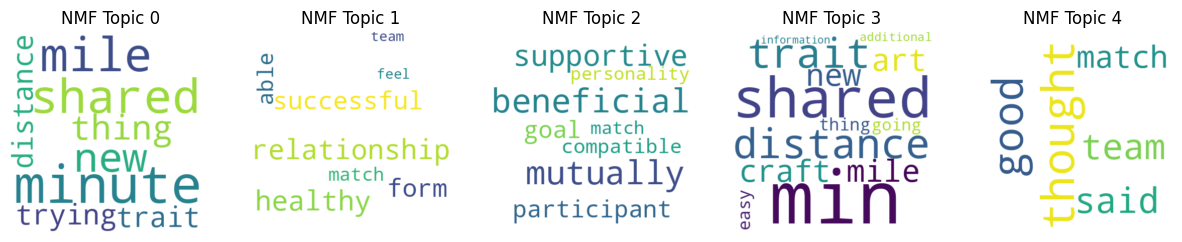

In [ ]:
import re
import nltk
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()
stopwords = set(nltk.corpus.stopwords.words('english'))

# Define unwanted words and cleaning pattern
words_to_remove = ['child', 'little', 'mentor']
pattern = r'\b(?:' + '|'.join(map(re.escape, words_to_remove)) + r')\b|\W+|\d+'

# Preprocessing function
def clean_and_lemmatize(text):
    text = re.sub(pattern, ' ', text.lower())  # Lowercase and remove unwanted characters
    tokens = word_tokenize(text)  # Tokenize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords and len(word) >= 3]  # Lemmatize and remove stopwords
    return ' '.join(tokens)

# Apply cleaning function
rationals['Cleaned_Text'] = rationals['Rationale for Match'].apply(clean_and_lemmatize)

# Vectorization with TF-IDF
vectorizer = TfidfVectorizer(ngram_range=(2,3), stop_words='english', max_features=5000)
tfidf_matrix = vectorizer.fit_transform(rationals['Cleaned_Text'])

# Apply NMF (better than LDA for short texts)
num_topics = 5  # Adjust based on coherence scores or experiment
nmf_model = NMF(n_components=num_topics, random_state=42)
nmf_topics = nmf_model.fit_transform(tfidf_matrix)

# Get top words per topic
words = vectorizer.get_feature_names_out()

# Function to print topics in a neat format (similar to mglearn print_topics)
def print_topics(model, feature_names, num_topics, n_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        top_words = [feature_names[i] for i in topic.argsort()[-n_words:]]  # Top n_words words per topic
        print(f"  {', '.join(top_words)}\n")

print("### NMF Topics ###")
print_topics(nmf_model, words, num_topics, n_words=10)

# Apply LDA (alternative method)
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_topics = lda_model.fit_transform(tfidf_matrix)

print("### LDA Topics ###")
print_topics(lda_model, words, num_topics, n_words=10)

# Visualize topics using Word Clouds
fig, axes = plt.subplots(1, num_topics, figsize=(15, 5))
for i, topic in enumerate(nmf_model.components_):
    wordcloud = WordCloud(width=400, height=400, background_color='white').generate(' '.join([words[j] for j in topic.argsort()[-10:]]))
    axes[i].imshow(wordcloud, interpolation="bilinear")
    axes[i].axis("off")
    axes[i].set_title(f'NMF Topic {i}')

plt.show()

# Optionally, you can repeat the WordCloud visualization for LDA if desired.


## BERT

In [ ]:
!pip install bertopic
!pip install sentence-transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 751.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 58.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [ ]:
import pandas as pd
from bertopic import BERTopic
from sklearn.feature_extraction.text import TfidfVectorizer
from sentence_transformers import SentenceTransformer


RuntimeError: empty_like method already has a different docstring

In [ ]:
# Extract the cleaned rationale text
texts = rationals['Cleaned Rationale for Match'].dropna().tolist()
# Load a Sentence-BERT model for better topic representation
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")  # Fast & lightweight

# Initialize BERTopic model
bertopic_model = BERTopic(embedding_model=embedding_model, verbose=True)

# Fit the model on the cleaned text data
topics, probs = bertopic_model.fit_transform(texts)
# Print the top topics
bertopic_model.get_topic_info().head(10)
for i in range(5):  # Change 5 to however many topics you want to check
    print(f"Topic {i}: {bertopic_model.get_topic(i)}\n")


## Trying prediction for 2 Topics

In [ ]:
#get topics for each row

# Transform the cleaned text using the same TF-IDF vectorizer
tfidf_matrix = vectorizer.transform(rationals['Cleaned Rationale for Match'])

# Get topic distributions for each row
topic_distributions = nmf_model.transform(tfidf_matrix)

rationals['Topic 1 val']= topic_distributions[:,0]
rationals['Topic 2 val']= topic_distributions[:,1]

rationals.head()

,Match ID 18Char,Rationale for Match,Match Length,Closure Reason,Stage,Cleaned Rationale for Match,Topic 1 val,Topic 2 val
10,a1v2J000002uR0JQAU,Their shared interests include spending time o...,46.1,Child/Family: Feels incompatible with volunteer,Closed,spending outdoors caring animal horseback ridi...,0.077419,0.000000
72,a1v2J0000028enKQAQ,Shared interests like being creative and tryin...,28.3,Child/Family: Moved,Closed,creative trying new lilly could someone outsid...,0.054561,0.000000
86,a1v2J000002ACUBQA4,"Both mentor and child have positive, bright, a...",13.1,Volunteer: Feels incompatible with child/family,Closed,positive bright talkative personality open man...,0.061354,0.055905
97,a1v2J000002uTnjQAE,mentor and child were match because of their c...,71.0,Child: Graduated,Closed,personality distance intelligent open deeper c...,0.041644,0.041560
140,a1v2J0000028PciQAE,mentor and child were matched because they are...,68.6,Child: Graduated,Closed,active adventurous outdoorsy many including sp...,0.052386,0.000000


In [ ]:
#linear regression using OLS

import statsmodels.api as sm

# Define the dependent variable (target)
y = rationals['Match Length']

# Define the independent variables (predictors)
X = rationals[['Topic 1 val', 'Topic 2 val']]

# Add a constant (intercept)
X = sm.add_constant(X)

# Fit the OLS model
reg1 = sm.OLS(y, X)
results1 = reg1.fit()

# Print the summary
print(results1.summary())


                            OLS Regression Results                            
Dep. Variable:           Match Length   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.674
Date:                Thu, 27 Mar 2025   Prob (F-statistic):              0.188
Time:                        00:01:13   Log-Likelihood:                -9209.2
No. Observations:                2204   AIC:                         1.842e+04
Df Residuals:                    2201   BIC:                         1.844e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          19.0806      0.699     27.302      

In [ ]:

#linear regression using OLS

import statsmodels.api as sm

# Define the dependent variable (target)
y = rationals['Closure Reason']

# Define the independent variables (predictors)
X = rationals[['Topic 1 val', 'Topic 2 val']]

# Add a constant (intercept)
X = sm.add_constant(X)

# Fit the OLS model
reg1 = sm.OLS(y, X)
results1 = reg1.fit()

# Print the summary
print(results1.summary())



## Trying different Topics

In [ ]:
rationals_fail = rationals[rationals['Successful Match']==False]

vectorizer = TfidfVectorizer(max_features=500, max_df = 0.003, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(rationals_fail['Cleaned Rationale for Match'])

num_topics = 2
nmf_model = NMF(n_components=num_topics, random_state=42)
nmf_topics = nmf_model.fit_transform(tfidf_matrix)

# Get top words per topic
words = vectorizer.get_feature_names_out()

In [ ]:
df_train.dropna(subset=['Match Support Contact Notes'], inplace=True)

In [ ]:
rationals_fail = df_train[df_train['Successful Match']==False]

vectorizer = TfidfVectorizer(max_features=1000, max_df = 0.0004, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(rationals_fail['Match Support Contact Notes'])

num_topics = 2
nmf_model = NMF(n_components=num_topics, random_state=42)
nmf_topics = nmf_model.fit_transform(tfidf_matrix)

# Get top words per topic
words = vectorizer.get_feature_names_out()

In [ ]:
words

array(['absolute', 'aby', 'accepts', 'accustomed', 'ace', 'adam',
       'adequate', 'adequately', 'admiration', 'adopted', 'advocated',
       'ailing', 'airline', 'akilia', 'alabama', 'aladdin', 'alarm',
       'aligning', 'alleviate', 'allianz', 'alligator', 'allstaff',
       'aloof', 'altered', 'alternatively', 'amd', 'amenity', 'amiya',
       'angel', 'angela', 'angelos', 'annabel', 'anonymous',
       'anticipation', 'antique', 'anybody', 'anyhting', 'appointed',
       'approves', 'approving', 'aquatennial', 'architect', 'armani',
       'armstrong', 'army', 'ash', 'ashely', 'ashlie', 'assault',
       'assessed', 'assumes', 'astronomy', 'athletics', 'auction',
       'audition', 'augsburg', 'authorized', 'automatic', 'avenger',
       'aviation', 'avid', 'awesomely', 'awww', 'ayan', 'ayla', 'azaliya',
       'azalyia', 'azyalia', 'babysit', 'babysits', 'backed', 'backlog',
       'backup', 'baker', 'banana', 'bandwidth', 'barn', 'barnhill',
       'basektball', 'baseline', 'b

In [ ]:
word = "sexual"

# Check if the word exists in the vocabulary
if word in vectorizer.vocabulary_:
    # Get the column index for the word
    word_index = vectorizer.vocabulary_[word]

    # Get the TF-IDF values for that word for all documents
    tfidf_values = tfidf_matrix[:, word_index].toarray().flatten()
    print(f"TF-IDF values for '{word}':", tfidf_values.mean())
else:
    print(f"The word '{word}' was not found in the vocabulary.")

TF-IDF values for 'sexual': 0.00035264586070305213


In [ ]:
# Function to print topics and remove duplicates
def print_topics_no_duplicates(model, feature_names, num_topics, n_words= 5):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        top_words = [feature_names[i] for i in topic.argsort()[-n_words:]]  # Get top n_words
        # Remove duplicates
        top_words = list(dict.fromkeys(top_words))  # Removing duplicates while maintaining order
        print(f"  {', '.join(top_words)}\n")

# Print NMF Topics without duplicates
print("### NMF Topics ###")
print_topics_no_duplicates(nmf_model, words, num_topics, n_words=50)


### NMF Topics ###
Topic 0:
  baking, ride, writing, project, try, volleyball, fashion, sporting, energy, singing, building, frisbee, kite, flying, event, jewelry, karts, hand, feeding, bird, making, duck, caring, climbing, rock, skating, horseback, ice, dancing, leader, humane, society, gym, painting, library, play, soccer, sledding, picnic, bowling, tag, laser, listening, sensitive, hiking, fishing, riding, bike, helpful, football

Topic 1:
  girl, came, addition, play, demeanor, female, redirection, adapt, role, hockey, singing, quieter, people, fine, aspires, cultural, situation, involved, connection, tennis, pet, soccer, athletic, grade, different, age, car, college, movement, dave, understanding, younger, class, past, academic, value, need, kindness, volunteer, bond, wanted, youth, participate, ranked, special, choice, process, best, coach, student

Topic 2:
  polite, behavior, girl, belief, energy, dog, community, place, potential, patient, math, need, bit, try, range, explore, 

In [ ]:
df_train['Stage'].value_counts()

,count
Stage,
Closed,27332
Active,11743
Pending Closure,270


# Successful Match

In [25]:
def is_successful_match(row):
    # Condition 1: remains active
    cond_active = (row['Stage'] == 'Active')

    # Condition 2: lasts a long time (Adjustable)
    cond_long = (row['Match Length'] >= df['Match Length'].median())

    # Condition 3: closes due to the age of Little
    cond_age = row['Closure Reason'] == 'Child: Graduated'

    # Condition 4: "Successful Match Closure" in Closure Reason
    cond_success_closure = row['Closure Reason'] == 'Successful Match Closure'

    return cond_active or cond_long or cond_age or cond_success_closure

In [26]:
df['Successful Match'] = df.apply(is_successful_match, axis=1)

In [27]:
df.groupby('Successful Match')['Introverted val'].mean()

,Introverted val
Successful Match,
False,0.030442
True,0.031041


In [ ]:
df_train['Successful Match'] = df_train.apply(is_successful_match, axis=1)

In [28]:
df['Successful Match'].value_counts()

,count
Successful Match,
True,1975
False,1300


In [ ]:
rationals['Successful Match'].value_counts()

,count
Successful Match,
True,1121
False,1083


In [ ]:
tfidf_matrix = vectorizer.transform(rationals['Cleaned Rationale for Match'])

# Get topic distributions for each row
topic_distributions = nmf_model.transform(tfidf_matrix)

rationals['Topic 1 val']= topic_distributions[:,0]
rationals['Topic 2 val']= topic_distributions[:,1]

rationals.head()

,Match ID 18Char,Rationale for Match,Match Length,Closure Reason,Stage,Cleaned Rationale for Match,Topic 1 val,Topic 2 val,Successful Match,Topic 3 val,Topic 4 val,Topic 5 val,Topic 8 val,Topic 9 val,Topic 13 val
10,a1v2J000002uR0JQAU,Their shared interests include spending time o...,46.1,Child/Family: Feels incompatible with volunteer,Closed,spending outdoors caring animal horseback ridi...,0.078346,0.000000,True,0.000597,0.000000,0.000000,0.000798,0.108743,0.000384
72,a1v2J0000028enKQAQ,Shared interests like being creative and tryin...,28.3,Child/Family: Moved,Closed,creative trying new lilly could someone outsid...,0.026834,0.000049,True,0.000500,0.001693,0.000000,0.000000,0.005214,0.000000
86,a1v2J000002ACUBQA4,"Both mentor and child have positive, bright, a...",13.1,Volunteer: Feels incompatible with child/family,Closed,positive bright talkative personality open man...,0.079226,0.002597,False,0.000735,0.000000,0.000000,0.003716,0.005825,0.031984
97,a1v2J000002uTnjQAE,mentor and child were match because of their c...,71.0,Child: Graduated,Closed,personality distance intelligent open deeper c...,0.064702,0.000000,True,0.000491,0.000000,0.003950,0.001460,0.011129,0.004862
140,a1v2J0000028PciQAE,mentor and child were matched because they are...,68.6,Child: Graduated,Closed,active adventurous outdoorsy many including sp...,0.043840,0.000620,True,0.000000,0.000000,0.008718,0.000000,0.000000,0.000000


In [ ]:
#linear regression using OLS

import statsmodels.api as sm

# Define the dependent variable (target)
y = rationals['Match Length']

# Define the independent variables (predictors)
X = rationals[['Topic 1 val', 'Topic 2 val']]

# Add a constant (intercept)
X = sm.add_constant(X)

# Fit the OLS model
reg1 = sm.OLS(y, X)
results1 = reg1.fit()

# Print the summary
print(results1.summary())


                            OLS Regression Results                            
Dep. Variable:           Match Length   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     19.33
Date:                Thu, 27 Mar 2025   Prob (F-statistic):           4.76e-09
Time:                        00:37:46   Log-Likelihood:                -9191.7
No. Observations:                2204   AIC:                         1.839e+04
Df Residuals:                    2201   BIC:                         1.841e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          17.9651      0.580     30.982      

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#linear regression
import sklearn.linear_model as lm
reg = lm.LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)


In [ ]:
import sklearn.metrics as sm
from sklearn.metrics import root_mean_squared_error
print(sm.root_mean_squared_error(y_test, y_pred))
print(sm.r2_score(y_test, y_pred))

15.819820083759073
0.02063890470858587


In [ ]:
y = rationals['Successful Match']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

import sklearn.linear_model as lm
reg = lm.LogisticRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
print(sm.accuracy_score(y_test, y_pred))
print(sm.r2_score(y_test, y_pred))

0.5714285714285714
-0.739408990358529


In [ ]:
rationals.drop(columns=['Topic 3 val', 'Topic 4 val', 'Topic 5 val', 'Topic 8 val', 'Topic 9 val' ], inplace=True)

In [ ]:
rationals.drop(columns=['Topic 13 val'], inplace=True)

In [ ]:
rationals.head()

,Match ID 18Char,Rationale for Match,Match Length,Closure Reason,Stage,Cleaned Rationale for Match,Topic 1 val,Topic 2 val,Successful Match
10,a1v2J000002uR0JQAU,Their shared interests include spending time o...,46.1,Child/Family: Feels incompatible with volunteer,Closed,spending outdoors caring animal horseback ridi...,0.078346,0.000000,True
72,a1v2J0000028enKQAQ,Shared interests like being creative and tryin...,28.3,Child/Family: Moved,Closed,creative trying new lilly could someone outsid...,0.026834,0.000049,True
86,a1v2J000002ACUBQA4,"Both mentor and child have positive, bright, a...",13.1,Volunteer: Feels incompatible with child/family,Closed,positive bright talkative personality open man...,0.079226,0.002597,False
97,a1v2J000002uTnjQAE,mentor and child were match because of their c...,71.0,Child: Graduated,Closed,personality distance intelligent open deeper c...,0.064702,0.000000,True
140,a1v2J0000028PciQAE,mentor and child were matched because they are...,68.6,Child: Graduated,Closed,active adventurous outdoorsy many including sp...,0.043840,0.000620,True


In [ ]:
rationals['Closure Reason'].unique()

array(['Child/Family: Feels incompatible with volunteer',
       'Child/Family: Moved',
       'Volunteer: Feels incompatible with child/family',
       'Child: Graduated', 'Volunteer: Moved',
       'Child/Family: Lost contact with agency',
       'Child/Family: Lost contact with volunteer/agency',
       'Volunteer: Lost contact with child/agency',
       'Child: Family structure changed',
       'Child/Family: Lost contact with volunteer',
       'Child: Severity of challenges', 'Volunteer: Time constraint',
       'Child/Family: Moved out of service area',
       'Volunteer: Moved out of service area', 'Child: Lost interest',
       'Volunteer: Health', 'Child/Family: Time constraints',
       'Volunteer: Lost contact with agency', 'Successful match closure',
       'Volunteer: Deceased', 'Volunteer: Lost contact with child/family',
       'Volunteer: Infraction of match rules/agency policies',
       'COVID impact', 'Volunteer: Unrealistic expectations',
       'Child/Family: Unre

In [ ]:
df_train['Closure Details'].nunique()

1756

In [24]:
import pandas as pd

df = pd.read_csv('/content/final_unique_matches_df.csv')

In [13]:
closure_dict = {'Child/Family: Feels incompatible with volunteer':1,
       'Volunteer: Feels incompatible with child/family':1,
                'Agency: Challenges with program/partnership':1,
                                'Child: Lost interest':1,
                       'Volunteer: Infraction of match rules/agency policies':7,
                'Child/Family: Infraction of match rules/agency policies':7,
                       'Agency: Concern with Volunteer re: child safety':7,



                'Child: Graduated':2,
      'Child/Family: Moved':2,
       'Volunteer: Moved':2,
                'Volunteer: Moved out of service area':2,
                'Child/Family: Moved out of service area':2,
                 'Volunteer: Changed workplace/school partnership':2,
       'Child: Changed school/site':2,
                       'Volunteer: Moved within service area':2,
       'Child/Family: Moved within service area':2,
                 'Changing Match Type':2,

                  'Child: Family structure changed':2,

       'Child/Family: Lost contact with agency':3,
       'Child/Family: Lost contact with volunteer/agency':3,
       'Volunteer: Lost contact with child/agency':3,
       'Child/Family: Lost contact with volunteer':3,
                'Volunteer: Lost contact with agency':3,
                 'Volunteer: Lost contact with child/family':3,


       'Child: Severity of challenges':4,
                'Volunteer: Health':4,
                'Volunteer: Deceased':4,
                'COVID impact':4,

       'Volunteer: Time constraint':5,
            'Child/Family: Time constraints':5,

                'Successful match closure':6,




                'Volunteer: Unrealistic expectations':1,
       'Child/Family: Unrealistic expectations':1,




               }

df['Closure Reason Encode'] = df['Closure Reason'].map(closure_dict)

In [14]:
df['Closure Reason Encode'].value_counts()*100/len(df)

,count
Closure Reason Encode,
2.0,24.610687
3.0,15.053435
5.0,13.984733
1.0,12.610687
4.0,5.801527
6.0,2.900763
7.0,1.038168


In [16]:
df['Introverted val'].describe()

,Introverted val
count,2204.000000
mean,0.030724
std,0.066116
min,0.000000
25%,0.000000
50%,0.002868
75%,0.041309
max,0.326124


In [ ]:
y = rationals['Closure Reason Encode']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

import sklearn.linear_model as lm
reg = lm.LogisticRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
print(sm.root_mean_squared_error(y_test, y_pred))
print(sm.r2_score(y_test, y_pred))

2.817180849095055
-0.4523696160700674


# Rationale for match and Closure Reason

In [ ]:
rationals.head()

,Match ID 18Char,Rationale for Match,Match Length,Closure Reason,Stage,Successful Match
10,a1v2J000002uR0JQAU,Their shared interests include spending time o...,46.1,Child/Family: Feels incompatible with volunteer,Closed,True
72,a1v2J0000028enKQAQ,Shared interests like being creative and tryin...,28.3,Child/Family: Moved,Closed,True
86,a1v2J000002ACUBQA4,"Both mentor and child have positive, bright, a...",13.1,Volunteer: Feels incompatible with child/family,Closed,False
97,a1v2J000002uTnjQAE,mentor and child were match because of their c...,71.0,Child: Graduated,Closed,True
140,a1v2J0000028PciQAE,mentor and child were matched because they are...,68.6,Child: Graduated,Closed,True


In [ ]:
clr_f = rationals['Closure Reason'].value_counts()
clr_f.reset_index(name='Count')

,Closure Reason,Count
0,Volunteer: Time constraint,357
1,Child: Changed school/site,160
2,Child: Lost interest,136
3,Volunteer: Moved,132
4,Volunteer: Moved out of service area,128
5,COVID impact,118
6,Volunteer: Lost contact with child/agency,112
7,Child/Family: Lost contact with volunteer/agency,95
8,Child/Family: Moved,87
9,Successful match closure,86


In [ ]:
clr_l = rationals.groupby('Closure Reason')['Match Length'].median().reset_index(name='Median Match Length')
clr = clr_l.merge(clr_f, on='Closure Reason')
clr = clr[clr['Median Match Length']<16]
clr = clr[clr['count']>50]
clr.sort_values(by='count', ascending=False)

,Closure Reason,Median Match Length,count
31,Volunteer: Time constraint,15.00,357
14,Child: Changed school/site,9.90,160
17,Child: Lost interest,14.40,136
28,Volunteer: Moved,12.40,132
26,Volunteer: Lost contact with child/agency,14.90,112
8,Child/Family: Lost contact with volunteer/agency,14.70,95
9,Child/Family: Moved,11.50,87
22,Volunteer: Feels incompatible with child/family,11.00,69
0,Agency: Challenges with program/partnership,9.80,63
4,Child/Family: Feels incompatible with volunteer,12.15,62


In [ ]:
r1 = rationals[rationals['Closure Reason']=='Agency: Challenges with program/partnership']
r1.head(10)

,Match ID 18Char,Rationale for Match,Match Length,Closure Reason,Stage,Successful Match
6451,a1v2J000002AFxiQAG,mentor and child were paired based on their di...,15.6,Agency: Challenges with program/partnership,Closed,True
6756,a1v2J000002ABfvQAG,Their shared interests include outdoor activit...,11.1,Agency: Challenges with program/partnership,Closed,False
8552,a1v2J00000283aPQAQ,"Their shared interests include being creative,...",17.7,Agency: Challenges with program/partnership,Closed,True
12509,a1v2J000002uhY6QAI,3.5mi 10mns Shared Traits: They are both sweet...,17.1,Agency: Challenges with program/partnership,Closed,True
14916,a1v2J0000028YM0QAM,Both mentor and child are friendly and talkati...,75.5,Agency: Challenges with program/partnership,Closed,True
15946,a1v2J000003T0HaQAK,"2.8 miles - 10 minutes Traits: Outdoorsy, good...",34.5,Agency: Challenges with program/partnership,Closed,True
17297,a1v2J000002ACrmQAG,"mentor, parent and littler were in agreement w...",41.2,Agency: Challenges with program/partnership,Closed,True
27080,a1v2J000003j5WDQAY,1. Distance: 11 miles (20 minutes) 2. Shared T...,7.6,Agency: Challenges with program/partnership,Closed,False
28251,a1v2J000003q6o7QAA,Distance: 7 min (2.6 mi) Traits: Outgoing/talk...,9.1,Agency: Challenges with program/partnership,Closed,False
28496,a1v2J000003lZHfQAM,1. Distance: 3 miles (6 minutes) 2. Shared Tra...,4.6,Agency: Challenges with program/partnership,Closed,False


In [ ]:
r1[r1['Successful Match']==False].head(10)

,Match ID 18Char,Rationale for Match,Match Length,Closure Reason,Stage,Successful Match
929,a1v2J0000027tYMQAY,Their shared interests include spending time o...,5.8,Volunteer: Moved,Closed,False
1748,a1v2J0000027hlxQAA,"Shared interests like outdoors, sports, and tr...",5.7,Volunteer: Moved,Closed,False
2053,a1v2J0000028kVuQAI,child is an active kids who likes building exp...,9.7,Volunteer: Moved,Closed,False
2296,a1v2J0000028SwLQAU,"Both child and mentor like animals, outdoor ac...",14.5,Volunteer: Moved,Closed,False
3107,a1v2J000002uRqVQAU,"mentor and child were paired on distance, pers...",1.9,Volunteer: Moved,Closed,False
3167,a1v2J000002ehANQAY,Distance: .4 mile-2min Shared traits: talkativ...,12.5,Volunteer: Moved,Closed,False
3565,a1v2J0000028cmYQAQ,"Shared interests like basketball, being active...",5.6,Volunteer: Moved,Closed,False
3671,a1v2J0000028lGtQAI,"mentor, little and parent were in agreement wi...",4.3,Volunteer: Moved,Closed,False
3745,a1v2J0000038YbKQAU,Distance: 7.5 miles 15-40 min. with traffic Sh...,8.1,Volunteer: Moved,Closed,False
4382,a1v2J0000027iv2QAA,"Both child and Webster are smart, curious, and...",13.3,Volunteer: Moved,Closed,False


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37891 entries, 0 to 39344
Data columns (total 69 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Match ID 18Char                                    37891 non-null  object        
 1   Completion Date                                    37767 non-null  datetime64[ns]
 2   Match Support Contact Notes                        37891 non-null  object        
 3   Stage                                              37891 non-null  object        
 4   Little ID                                          37891 non-null  object        
 5   Big ID                                             37891 non-null  object        
 6   Big County                                         30936 non-null  object        
 7   Big Age                                            37891 non-null  int64         
 8   Big Occupation       

In [ ]:
df_train['Little Contact: Language(s) Spoken'].head()

,Little Contact: Language(s) Spoken
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


# Mental Health severity

In [ ]:
!pip install transformers

In [ ]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("KevSun/mentalhealth_LM")
model = AutoModelForSequenceClassification.from_pretrained("KevSun/mentalhealth_LM")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/967 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

In [ ]:
import torch
def predict_text(text, model, tokenizer):
    # Encode the text using the tokenizer
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)

    # Forward pass, get logits
    with torch.no_grad():
        outputs = model(**inputs)

    # Extract logits
    logits = outputs.logits

    # Convert logits to probabilities
    probabilities = torch.softmax(logits, dim=-1)
    max_probability, predicted_class_index = torch.max(probabilities, dim=-1)

    return predicted_class_index.item()

text = "I was okay just a moment ago. I will learn how to be okay again."
predicted_class = predict_text(text, model, tokenizer)
print(f"Predicted class: {predicted_class}")


Predicted class: 2


In [ ]:
df_grouped = df_train.groupby('Match ID 18Char') \
                     .agg({'Match Support Contact Notes': ' '.join}) \
                     .reset_index() \
                     .rename(columns={'Match Support Contact Notes': 'MSCN full'})


In [ ]:
df_grouped.dropna(inplace=True)

In [ ]:
df_grouped.head()

,Match ID 18Char,MSCN full
0,a1v2J0000027CWYQA2,Activities:This match participated in-end-of-...
1,a1v2J0000027CWfQAM,Activities:Sami came in to re-connect with ch...
2,a1v2J0000027CWiQAM,Activities:mentor said she has been playing g...
3,a1v2J0000027CWoQAM,Activities:mentor said she lets child decide ...
4,a1v2J0000027CWpQAM,Activities:mentor and child participated in a...


In [ ]:
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Define the set of stop words
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Convert to lower case
    text = text.lower()
    # Remove punctuation and non-alphabetical characters (keep whitespace)
    text = re.sub(r'[^a-z\s]', ' ', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords and tokens that are too short (e.g., less than 3 characters)
    tokens = [token for token in tokens if token not in stop_words and len(token) > 2]
    # Join tokens back into a string
    cleaned_text = ' '.join(tokens)
    return cleaned_text

# Apply the cleaning function to the 'MSCN full' column in df_grouped
df_grouped['MSCN full'] = df_grouped['MSCN full'].apply(clean_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df_grouped['Mental Health Severity'] = df_grouped['MSCN full'].apply(predict_text, args=(model, tokenizer))

In [ ]:
df_grouped[['MSCN full','Mental Health Severity']].head(5)

,MSCN full,Mental Health Severity
0,activitiesthis match participated inendoftheye...,3
1,activitiessami came reconnect child child said...,0
2,activitiesmentor said playing games always ask...,2
3,activitiesmentor said lets child decide activi...,0
4,activitiesmentor child participated end year c...,0


In [ ]:
df_grouped[['Match ID 18Char','Mental Health Severity']].to_csv('Mental Health Severity.csv', index=False)

In [ ]:
df_grouped['Mental Health Severity'].value_counts()

,count
Mental Health Severity,
0,2130
2,626
3,484
1,14
4,6
5,4


In [ ]:
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3264 entries, 0 to 3263
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Match ID 18Char         3264 non-null   object
 1   MSCN full               3264 non-null   object
 2   Mental Health Severity  3264 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 76.6+ KB


In [ ]:
import pandas as pd
from tqdm.notebook import tqdm

# Define batch size (10,000 rows per batch)
batch_size = 10000

# List to accumulate predictions for final assignment
predictions = []

# Get the total number of rows
n_rows = len(df_grouped)

# Loop over the DataFrame in batches
for start in tqdm(range(0, n_rows, batch_size), desc="Processing Batches"):
    end = min(start + batch_size, n_rows)
    batch = df_grouped.iloc[start:end]

    # Apply your prediction function to the batch column 'MSCN full'
    batch_preds = batch['MSCN full'].apply(predict_text, args=(model, tokenizer)).tolist()

    # Store intermediate predictions for later assignment
    predictions.extend(batch_preds)

    # Optionally, save the intermediate results to a CSV file
    intermediate = batch.copy()
    intermediate['Mental Health Severity'] = batch_preds
    intermediate.to_csv(f"intermediate_results_{start}_{end}.csv", index=False)

# Once all batches are processed, assign the full predictions to your DataFrame
df_grouped['Mental Health Severity'] = predictions


Processing Batches:   0%|          | 0/1 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
df_grouped['Mental Health Severity'].head()

In [ ]:
import pandas as pd

unique_matches = pd.read_csv('/content/final_unique_matches_df.csv')

In [ ]:
unique_matches.columns

Index(['Unnamed: 0', 'Match ID 18Char', 'Completion Date',
       'Match Support Contact Notes', 'Stage', 'Little ID', 'Big ID',
       'Big County', 'Big Age', 'Big Occupation', 'Big: Military',
       'Big Approved Date', 'Big Level of Education', 'Big Languages',
       'Big Gender', 'Big Birthdate', 'Big Employer', 'Program',
       'Program Type', 'Big Race/Ethnicity', 'Closure Reason',
       'Closure Details', 'Match Activation Date',
       'Match Closure Meeting Date', 'Rationale for Match',
       'Big Enrollment: Record Type', 'Big Assessment Uploaded',
       'Big Acceptance Date', 'Big Car Access', 'Big Days Acceptance to Match',
       'Big Days Interview to Acceptance', 'Big Days Interview to Match',
       'Big Open to Cross-Gender Match', 'Big Re-Enroll',
       'Big Contact: Preferred Communication Type',
       'Big Contact: Former Big/Little',
       'Big Contact: Interest Finder - Sports',
       'Big Contact: Interest Finder - Places To Go',
       'Big Contact: I

In [ ]:
unique_matches['Big Days Interview to Acceptance'].describe()

,Big Days Interview to Acceptance
count,1372.000000
mean,58.290816
std,115.061316
min,0.000000
25%,21.000000
50%,32.000000
75%,57.000000
max,1617.000000


In [ ]:
unique_matches['Match Quartile'] = pd.qcut(unique_matches['Big Days Interview to Acceptance'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

In [ ]:
df = unique_matches[unique_matches['Match Length'] < 16]

In [ ]:
unique_matches['Match Quartile'].value_counts()*100/len(unique_matches)

,count
Match Quartile,
Q1,10.900763
Q3,10.564885
Q4,10.229008
Q2,10.198473
